##spam email detection

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [57]:
#Load the dataset

data = pd.read_csv('spam.csv', encoding='latin-1')
data = data[['v1', 'v2']]
data.columns = ['label', 'text']

In [58]:
data

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ï¿½_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [59]:
data.shape


(5572, 2)

In [60]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [61]:
data.describe()


,label,text
count,5572,5572
unique,2,5163
top,ham,"Sorry, I'll call later"
freq,4825,30


In [62]:
data[data.duplicated()]

,label,text
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [63]:
data = data.drop_duplicates()
data

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ï¿½_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [64]:
data[data.duplicated()]

,label,text


<ipython-input-65-60f376f9152a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='label', palette=['black', 'gold'])


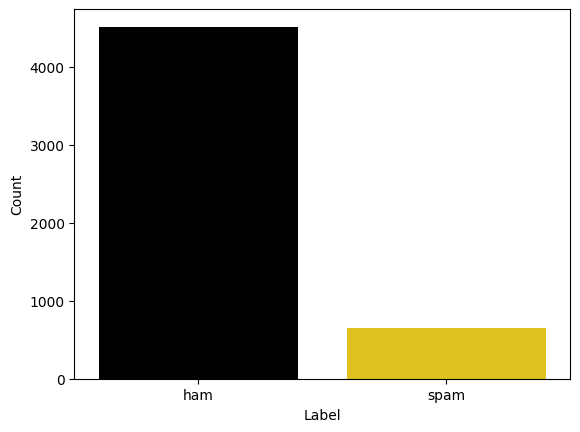

In [65]:
sns.countplot(data=data, x='label', palette=['black', 'gold'])

#Plotting of Spam and Ham distribution

plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [66]:
# Preprocessing

def preprocess_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Remove URLs
    text = re.sub(r"\@\w+|\#", "", text)  # Remove usernames and hashtags
    text = re.sub(r"[^a-zA-Z]", " ", text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    text = nltk.word_tokenize(text)  # Tokenization
    text = [word for word in text if word not in nltk.corpus.stopwords.words('english')]  # Remove stopwords
    text = [nltk.stem.WordNetLemmatizer().lemmatize(word) for word in text]  # Lemmatization
    return " ".join(text)


In [67]:
#Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['text'])
y = data['label'].apply(lambda x: 1 if x == 'spam' else 0)

In [68]:
#Model Building

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
#SVM

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred = svc_classifier.predict(X_test)
accuracy_s = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy SVM: {accuracy_s:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy SVM: 0.97
Confusion Matrix:
[[915   2]
 [ 28  88]]


In [70]:
#Decision Tree model

from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)
y_pred = decision_tree_classifier.predict(X_test)
accuracy_d = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy Decision Tree: {accuracy_d:.2f}')
print('Confusion Matrix :')
print(conf_matrix)


Accuracy Decision Tree: 0.96
Confusion Matrix :
[[900  17]
 [ 21  95]]


In [71]:
#Random Forest model

from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)
y_pred = random_forest_classifier.predict(X_test)
accuracy_r = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy Random Forest: {accuracy_r:.2f}')
print('Confusion Matrix :')
print(conf_matrix)

Accuracy Random Forest: 0.98
Confusion Matrix :
[[914   3]
 [ 20  96]]


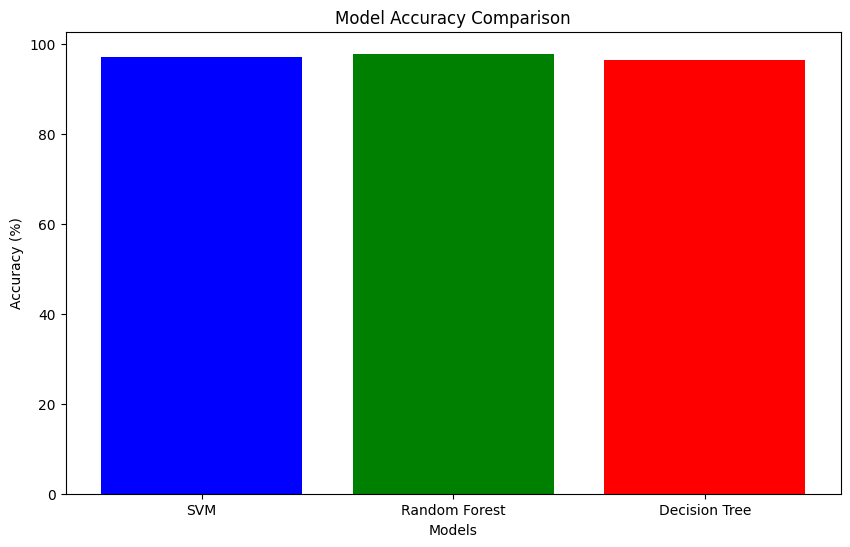

In [72]:
models = ["SVM", "Random Forest", "Decision Tree"]
accuracies = [accuracy_s * 100, accuracy_r * 100, accuracy_d * 100]
colors = ['blue', 'green', 'red']
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.show()